<a href="https://colab.research.google.com/github/eaglehkim/python/blob/main/prac4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# SVM : Support Vector Machine
#    - 가장 인공지능스러운 기법
#    - 현재는 입지가 좀 애매, 딥러닝이 휩쓸고 다녀서
#    - 그러나 직관적이고 계산이 빠른 측면이 존재
#    - ex) 앱에서 간단하게 돌아가는 것? SVM이 유리

# SVM - SVC : Support Vector Classifier
#     - SVR : Support Vector Regressor
#        - 거의 SVC를 쓴다, SVC가 정확도도 더 좋은듯?

# 가장 근접한 두 점 사이에 마진(여유분)이 가장 큰 벡터 = 서포트 벡터

# 얼마나 버릴 것이냐? Cost : 값
# - 얼마나 많은 데이터 샘플이 다른 클래스에 놓이는 것을 허용하는지 결정

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

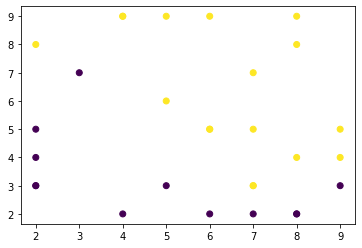

In [ ]:
df = pd.read_csv("/content/work.csv")

ap = np.array(df['app'])
pe = np.array(df['per'])
target = np.array(df['fav'])


plt.scatter(ap, pe, c=target);

In [ ]:
data = np.column_stack((ap, pe))
data

array([[8, 9],
       [7, 5],
       [2, 3],
       [4, 2],
       [5, 9],
       [9, 3],
       [7, 3],
       [6, 5],
       [7, 2],
       [5, 6],
       [4, 9],
       [9, 5],
       [5, 3],
       [2, 3],
       [7, 3],
       [8, 2],
       [2, 8],
       [3, 7],
       [2, 5],
       [7, 7],
       [6, 9],
       [9, 4],
       [8, 2],
       [6, 5],
       [8, 8],
       [2, 4],
       [8, 4],
       [6, 2],
       [4, 9]])

In [ ]:
from sklearn.model_selection import train_test_split

input_train, input_test, output_train, output_test = train_test_split(data, target, 
                                                                      random_state=123)

In [ ]:
from sklearn.svm import SVC

# kernel = 어떤 커널을 통해서 값을 도출할 것이냐? 
#          linear(선형)? polynomial(다항,곡선)? RBF(기본값, radius bias function, 가우시안 커널)?
#          RBF - 함수의 형태가 아니라 확률의 형태로 만든다, 조금 더 높은 확률을 고른다.
#                많이 겹쳐있는 애매한 곳은 나누기가 어려워서 확률적으로 고름
#              - gamma 매개변수 : 하나의 데이터 샘플이 영향력을 행사하는 거리
#                               : 감마가 클수록 한 데이터 포인터들이 영향력을 행사하는 거리가 짧아지고
#                                 감마가 낮을수록 커진다

# C = 커질수록 실수를 용납하지 않는다. 과적합 가능성이 높아진다. 0.01, 0.05 등 다양

model = SVC(kernel='linear', C=0.1)     # 장점 - 수치가 나온다
model.fit(input_train, output_train)

model2 = SVC(kernel='poly', C=0.1)
model2.fit(input_train, output_train)

model3 = SVC(kernel='rbf', C=0.1)
model3.fit(input_train, output_train)

print("Linear 학습 점수 : {}".format(model.score(input_train, output_train)))
print("Linear 평가 점수 : {}".format(model.score(input_test, output_test)))
print()

print("Poly 학습 점수 : {}".format(model2.score(input_train, output_train)))
print("Poly 평가 점수 : {}".format(model2.score(input_test, output_test)))
print()

print("RBF 학습 점수 : {}".format(model3.score(input_train, output_train)))
print("RBF 평가 점수 : {}".format(model3.score(input_test, output_test)))

Linear 학습 점수 : 0.8571428571428571
Linear 평가 점수 : 0.875

Poly 학습 점수 : 0.8571428571428571
Poly 평가 점수 : 0.875

RBF 학습 점수 : 0.6190476190476191
RBF 평가 점수 : 0.5


In [ ]:
# 선형 svc의 상관계수
coef = model.coef_
coef
# [a1, a2]

array([[0.30882353, 0.51470588]])

In [ ]:
intercept = model.intercept_
intercept

array([-3.73529412])

In [ ]:
a1 = coef[0][0]
a2 = coef[0][1]

In [ ]:
# y = ax + b
a = -(a1/a2)
b = -(intercept[0]/a2)

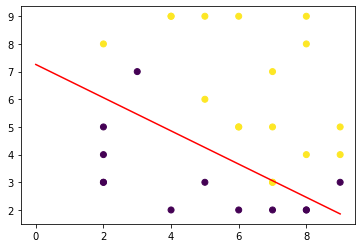

In [ ]:
x = np.arange(0, 10)
plt.scatter(ap, pe, c=target)
plt.plot(x, a*x + b, 'r');

In [ ]:
# 릿지 : 변수가 중요, 가중치의 제곱들을 더하는 방식이라 급변한다.
# 랏쏘 : 변수보단 조합이 중요하다. 가중치의 절대값들을 더한다

data = pd.read_csv("https://bit.ly/perch_csv")
data.head()

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


In [ ]:
data = np.array(data)
target = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

(56, 56)

In [ ]:
input_train, input_test, output_train, output_test = train_test_split(data, target, 
                                                                      random_state=123)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(input_train, output_train)

LinearRegression()

In [ ]:
print("Linear 학습 점수 : {}".format(model.score(input_train, output_train)))
print("Linear 평가 점수 : {}".format(model.score(input_test, output_test)))

Linear 학습 점수 : 0.951804711093903
Linear 평가 점수 : 0.9118165004899212


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

model = PolynomialFeatures(degree=1)
train_poly = model.fit_transform(input_train)
test_poly = model.fit_transform(input_test)

In [ ]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=0.1)
model.fit(train_poly, output_train)

Ridge(alpha=0.1)

In [ ]:
model.score(test_poly, output_test)

0.9116868896642765

In [ ]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.1)
model.fit(train_poly, output_train)

Lasso(alpha=0.1)

In [ ]:
model.score(test_poly, output_test)

0.9116868896642765

**2022 - 2 - 17**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
df['TARGET'] = boston.target 
df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
Tax = np.array(df['TAX']).reshape(-1,1)
Target = np.array(df['TARGET']).reshape(-1,1)

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_output, test_output = train_test_split(Tax, Target, test_size=0.3)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_input, train_output)

LinearRegression()

In [ ]:
model.coef_, model.intercept_
# y = ax + b
# a = -0.02457067, b = 32.64263171

(array([[-0.02457067]]), array([32.64263171]))

In [ ]:
model.predict([[300]])

array([[25.27142998]])

In [ ]:
model.score(test_input, test_output)

0.2592978838222414

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
# RM, B, LSTAT, CHAS, TAX
TAX = np.array(df['TAX']).reshape(-1,1)
B = np.array(df['B']).reshape(-1,1)
RM = np.array(df['RM']).reshape(-1,1)
CHAS = np.array(df['CHAS']).reshape(-1,1)
LSTAT = np.array(df['LSTAT']).reshape(-1,1)

In [ ]:
data = np.column_stack((RM, B, LSTAT, CHAS, TAX))

In [ ]:
train_input, test_input, train_output, test_output = train_test_split(data, Target, test_size=0.3)

In [ ]:
# Ridge
from sklearn.linear_model import Ridge
model_ridge = Ridge()
model_ridge.fit(train_input, train_output)

Ridge()

In [ ]:
model_ridge.score(test_input, test_output)

0.6972546723057615

In [ ]:
# alpha 값 : 규제를 얼마나 할 것이냐
model_ridge2 = Ridge(alpha=0.5)
model_ridge2.fit(train_input, train_output)

Ridge(alpha=0.5)

In [ ]:
model_ridge2.score(test_input, test_output)

0.6979484334079419

In [ ]:
model_ridge3 = Ridge(alpha=3)
model_ridge3.fit(train_input, train_output)

Ridge(alpha=3)

In [ ]:
model_ridge3.score(test_input, test_output)

0.6945830106179534

In [ ]:
from sklearn.linear_model import Lasso 
model_lasso = Lasso(alpha=0.2)
model_lasso.fit(train_input, train_output)

Lasso(alpha=0.2)

In [ ]:
model_lasso.score(test_input, test_output)

0.6649130627868867

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(data)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
ls2 = Lasso(alpha=0.5)
ls2.fit(test_scaled, test_output)

Lasso(alpha=0.5)

In [ ]:
ls2.score(test_scaled, test_output)

0.7491686476022238

In [ ]:
import cv2

In [ ]:
# 이미지 가져오기, 흑백화
for i in [1,2,3]:
  globals()['image{}'.format(i)] = cv2.imread('/content/000{0}.jpg'.format(i), cv2.IMREAD_GRAYSCALE)
plt.imshow(image1)

In [ ]:
# 이미지 리사이징
for i in [1,2,3]:
  globals()['image{}_resized'.format(i)] = cv2.resize(locals()['/content/000{0}.jpg'.format(i)], (100,100)).astype(np.int16)
plt.imshow(image1_resized)

In [ ]:
# 행렬로 나뉜 이미지를 1차원으로 줄이기
for i in [1,2,3]:
  globals()['image{}_resized_reshaped'.format(i)] = locals()['image{}_resized_scaled'.format(i)].reshape(-1,100*100)

In [ ]:
target1 = np.array([0])
target2 = np.array([1])
target3 = np.array([2])

In [ ]:
for i in [1,2,3]:
  globals()['image{}_resized_reshaped'.format(i)] = np.append(locals()['image{}_resized_reshaped'.format(i)], locals()['target{}'].format(i))

In [ ]:
data = np.ones(10001)
for i in [1,2,3]:
  data = np.vstck((data, locals()['image{}_resized_reshaped'.format(i)]))
data = data[1:]

In [ ]:
data_saved = pd.DataFrame(data, columns = np.arange(0, 10001))
data_saved.to_csv('data.csv')

In [ ]:
input = data_saved[np.arange(0, 10000)]
target = data_saved[10000]

In [ ]:
train_input, test_input, train_output, test_output = train_test_split(input, target, test_size=0.3)

**2022 - 2 - 22**

In [ ]:
# 인공신경망 - 퍼셉트론
# 딥러닝과 인공신경망은 비슷한 것이다. (인공신경망은 머신러닝의 일종)
# 인공신경망 - Artificial Neural Network (ANN)
#     - 인간의 신경망을 모방
#     - 정확도를 높이려면 데이터 수가 많아야 한다
#     - 구글 -< 알파고
# tensorflow (keras)

In [ ]:
from sklearn.linear_model import Perceptron

In [ ]:
x = [[0, 0], [0, 1], [1, 0], [1, 1]]
y = [-1, 1, 1, -1]

In [ ]:
Perc = Perceptron()
Perc.fit(x, y)
Perc.score(x,y)

0.5

In [ ]:
Perc.coef_

array([[0., 0.]])

In [ ]:
Perc.intercept_

array([0.])

In [ ]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
digit = datasets.load_digits()

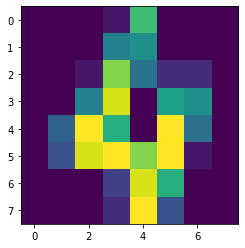

In [ ]:
plt.imshow(digit.images[4]);

In [ ]:
digit.images[15]

array([[ 0.,  5., 12., 13., 16., 16.,  2.,  0.],
       [ 0., 11., 16., 15.,  8.,  4.,  0.,  0.],
       [ 0.,  8., 14., 11.,  1.,  0.,  0.,  0.],
       [ 0.,  8., 16., 16., 14.,  0.,  0.,  0.],
       [ 0.,  1.,  6.,  6., 16.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  5., 16.,  3.,  0.,  0.],
       [ 0.,  1.,  5., 15., 13.,  0.,  0.,  0.],
       [ 0.,  4., 15., 16.,  2.,  0.,  0.,  0.]])

In [ ]:
input = digit.data
output = digit.target

In [ ]:
from sklearn.model_selection import train_test_split 
train_input, test_input, train_output, test_output = train_test_split(input, output)

In [ ]:
Perc.fit(train_input, train_output)

Perceptron()

In [ ]:
Perc.score(test_input, test_output)

0.9044444444444445

**2022 - 2 - 24**

In [ ]:
# 원하는 데이터가 없다면?
# - 필요한 데이터 : A, B, C - 0, 1
# - 없는 데이터   : A
# - 혹시 D가 A를 대체할 수 있는가? 그렇다면 D와 A의 관계성을 논리적으로 설명할 수 있어야 한다.
# (가정을 해야한다. hypothesis)

In [ ]:
# 인공신경망에서 Z의 값은
# -무한 < Z < 무한    -> 활성함수(sigmoid, relu)를 통해서
#   0  < x <  1 (sigmoid)
#   적당한 범위 (relu) 로 만들어준다
# 그리고 이런 활성함수가 다양하다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

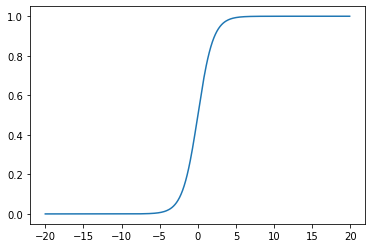

In [2]:
z = np.arange(-20, 20, 0.1)
phi = 1 / (1 + np.exp(-z))
plt.plot(z, phi);

In [5]:
from sklearn import datasets
cancer = datasets.load_breast_cancer()
df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df['target'] = cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
cancer_scaled = SS.fit_transform(cancer.data)
cancer_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [7]:
input = cancer_scaled
output = cancer.target

In [8]:
output, input

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
        0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
        1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input, output, test_size = 0.3)

In [10]:
from sklearn.linear_model import Perceptron, LogisticRegression
Perc = Perceptron()
Logi = LogisticRegression()

In [11]:
Perc.fit(X_train, y_train)
Logi.fit(X_train, y_train)

LogisticRegression()

In [13]:
Perc.score(X_test, y_test)

0.9707602339181286

In [14]:
Logi.score(X_test, y_test)

0.9941520467836257

In [15]:
Logi.coef_, Logi.intercept_

(array([[-0.30579894, -0.473845  , -0.29275573, -0.35321274, -0.09198907,
          0.54234396, -0.75056824, -0.97474157,  0.08205696,  0.01624638,
         -1.2244384 ,  0.34587873, -0.67014519, -0.91068945, -0.31928877,
          1.07833889,  0.0626196 , -0.41424462,  0.39963297,  0.52392948,
         -0.99192048, -1.11940715, -0.75556918, -0.90109267, -0.34931084,
          0.08268817, -0.6334671 , -0.91937495, -0.92772677, -0.41245864]]),
 array([0.15231936]))

In [23]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, Perc.predict(X_test))
CM

array([[74,  1],
       [ 4, 92]])

In [24]:
CM2 = confusion_matrix(y_test, Logi.predict(X_test))
CM2

array([[74,  1],
       [ 0, 96]])

In [25]:
acc = (CM2[0][0] + CM2[1][1]) / (CM[0][0] + CM[0][1] + CM[1][0] + CM[1][1])
acc

0.9941520467836257

In [28]:
sense = CM2[0][0] / (CM2[0][0] + CM2[1][0])
sense

1.0

In [29]:
Specificity = CM2[1][1] / (CM2[0][1]+CM2[1][1])
Specificity

0.9896907216494846

In [34]:
Precision = CM2[0][0] / (CM2[0][0] + CM2[0][1])
Precision

0.9866666666666667

In [37]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
accuracy_score(y_test, Logi.predict(X_test))

0.9941520467836257

In [39]:
recall_score(y_test, Logi.predict(X_test))

1.0

In [47]:
from sklearn.metrics import roc_curve, roc_auc_score
Logi_prob = Logi.predict_proba(X_test)
Logi_prob = Logi_prob[:,1]
FPR, TPR, threshold = roc_curve(y_test, Logi_prob)
roc_auc_score(y_test, Logi.predict_proba(X_test)[:,1])

0.9990277777777778

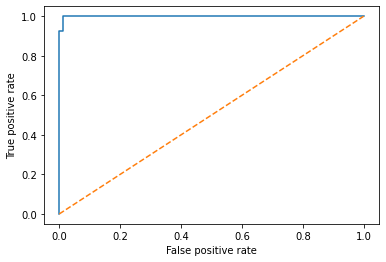

In [42]:
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate');